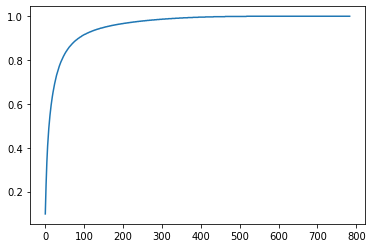

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
variant_number = 20
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)
dim = 784  # 28*28
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)
pca = PCA(svd_solver='full')
modelPCA = pca.fit(X_train)
X_train = modelPCA.transform(X_train)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
plt.plot(np.arange(dim), explained_variance, ls='-')

**Определите, какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.80+номер в списке%10. Построить график зависимости доли объясненной дисперсии от количества используемых ГК**

Explained Variance: 0.8 Number of Components: 44


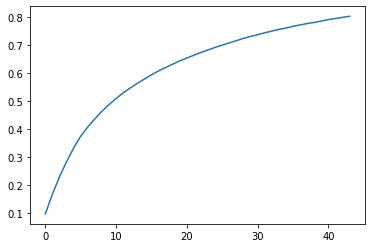

In [ ]:
variant_expectation = 0.8 + variant_number % 10 / 100
X_train = X_train.reshape(len(X_train), dim)
pca = PCA(n_components=variant_expectation, svd_solver='full')
modelPCA = pca.fit(X_train)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
count = explained_variance.size
plt.plot(np.arange(count), explained_variance, ls='-')
print("Explained Variance: " + str(round(variant_expectation, 2)) + " Number of Components: " + str(count))

**Введите количество верно классифицированных объектов класса номер в списке%9 для тестовых данных**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)
modelPCA = PCA(n_components=count, svd_solver='full').fit(X_test)
X_test = modelPCA.transform(X_test)
class_variant = variant_number % 9
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print("The number of correctly classified images contained in Class " + str(class_variant) + " is: " + str(
    CM[class_variant][class_variant]))

The number of correctly classified images contained in Class 2 is: 1070


**Введите вероятность отнесения 5 любых изображений из тестового набора к назначенному классу**

In [ ]:
import random
for i in range(5):
    num = random.randint(0, 10000)
    result = clf.predict_proba(X_test)[num][y_pred[num]]
    print("The probability that picture No." + str(num) + " belongs to Class " + str(y_pred[num]) + " is: " + str(
        round(result, 3)))

The probability that picture No.6892 belongs to Class 6 is: 0.367
The probability that picture No.3967 belongs to Class 0 is: 0.879
The probability that picture No.8350 belongs to Class 4 is: 0.645
The probability that picture No.421 belongs to Class 9 is: 0.444
The probability that picture No.2367 belongs to Class 1 is: 0.695


**Определите Accuracy, Precision, Recall or F1 для обученной модели**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
targets = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print()
print(classification_report(y_test, y_pred, target_names=targets))

Accuracy: 0.8257936507936507

              precision    recall  f1-score   support

     Class 0       0.92      0.90      0.91      1293
     Class 1       0.93      0.96      0.94      1416
     Class 2       0.84      0.85      0.85      1262
     Class 3       0.74      0.75      0.75      1290
     Class 4       0.78      0.83      0.80      1214
     Class 5       0.69      0.64      0.66      1158
     Class 6       0.88      0.93      0.90      1204
     Class 7       0.87      0.90      0.88      1318
     Class 8       0.80      0.79      0.79      1188
     Class 9       0.76      0.68      0.72      1257

    accuracy                           0.83     12600
   macro avg       0.82      0.82      0.82     12600
weighted avg       0.82      0.83      0.82     12600

